## This is a demo of the AAP-Imfit routine to model Gaussian functions onto VLBi intesity maps.

In [1]:
import glob
import importlib
import pandas as pd
from pathlib import Path
from astropy.io import fits ; from astropy.time import Time
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
import main.main_functions as mf
importlib.reload(mf)

data_update using version casarundata-2025.06.17-1.tar.gz, acquiring the lock ... 
'str' object has no attribute 'append'


2025-07-11 03:04:53	SEVERE	::casa	
2025-07-11 03:04:53	SEVERE	::casa	ERROR! Unexpected exception while doing auto updates or checking on the status of the data at measurespath
2025-07-11 03:04:53	SEVERE	::casa	visit https://casadocs.readthedocs.io/en/stable/notebooks/external-data.html for more information
2025-07-11 03:04:53	SEVERE	::casa	


<module 'main.main_functions' from '/Users/alfredoamador/Documentos/Astro/PhD/VLBA Sources/Paper/Public Code/main/main_functions.py'>

The routine operates over a list of .fits maps to be modelled and a list of the folders were they are placed. In this demo several maps are provided for 2 different blazar sources. 10 maps of 3C 279 from the BEAM-ME monitoring program, and 7 maps of 3C 454.3 from the MOJAVE monitoring program. In the following are the folders and files lists.

#### Folders and files contained in it for 3C 79:

In [2]:
folders_3C279 = pd.read_csv(f'../data/3C_279/folder_list.txt',header=None) ;  folders_3C279 = folders_3C279[0].tolist() ; display(folders_3C279)
files_3C279 = pd.read_csv(f'../data/3C_279/files_list.txt',header=None) ;  files_3C279 = files_3C279[0].tolist() ; display(files_3C279)

['../data/3C_279/2008-06-12',
 '../data/3C_279/2009-05-30',
 '../data/3C_279/2010-04-10',
 '../data/3C_279/2011-07-21',
 '../data/3C_279/2012-03-05',
 '../data/3C_279/2013-05-30',
 '../data/3C_279/2014-07-28',
 '../data/3C_279/2015-09-22',
 '../data/3C_279/2016-07-31',
 '../data/3C_279/2017-03-19']

['../data/3C_279/2008-06-12/3C279JUN08.IMAP',
 '../data/3C_279/2009-05-30/3C279MAY09.IMAP',
 '../data/3C_279/2010-04-10/3C279APR10E.IMAP',
 '../data/3C_279/2011-07-21/3C279JUL11.IMAP',
 '../data/3C_279/2012-03-05/3C279MAR12.IMAP',
 '../data/3C_279/2013-05-30/3C279MAY13.IMAP',
 '../data/3C_279/2014-07-28/3C279JUL14.IMAP',
 '../data/3C_279/2015-09-22/3C279SEP15.IMAP',
 '../data/3C_279/2016-07-31/3C279AUG16.IMAP',
 '../data/3C_279/2017-03-19/3C279MAR17.IMAP']

#### Same as 3C 454.3 Maps

In [3]:
folders_3C454 = pd.read_csv(f'../data/3C_454.3/folder_list.txt',header=None) ;  folders_3C454 = folders_3C454[0].tolist() ; display(folders_3C454)
files_3C454 = pd.read_csv(f'../data/3C_454.3/files_list.txt',header=None) ;  files_3C454 = files_3C454[0].tolist() ; display(files_3C454)

['../data/3C_454.3/2008-08-06',
 '../data/3C_454.3/2010-02-21',
 '../data/3C_454.3/2010-08-27',
 '../data/3C_454.3/2013-07-22',
 '../data/3C_454.3/2014-06-05',
 '../data/3C_454.3/2018-11-11',
 '../data/3C_454.3/2022-03-18']

['../data/3C_454.3/2008-08-06/2251+158.u.2008_08_06.icn.crpd.fits',
 '../data/3C_454.3/2010-02-21/2251+158.u.2010_02_21.icn.crpd.fits',
 '../data/3C_454.3/2010-08-27/2251+158.u.2010_08_27.icn.crpd.fits',
 '../data/3C_454.3/2013-07-22/2251+158.u.2013_07_22.icn.crpd.fits',
 '../data/3C_454.3/2014-06-05/2251+158.u.2014_06_05.icn.crpd.fits',
 '../data/3C_454.3/2018-11-11/2251+158.u.2018_11_11.icn.crpd.fits',
 '../data/3C_454.3/2022-03-18/2251+158.u.2022_03_18.icn.crpd.fits']

#### Select one files list and its corresponding folder list to fit those maps. The fuctions used here are declared in "main_functions.py"

Maps to be analized: 10
File: ../data/3C_279/2008-06-12/3C279JUN08.IMAP
Date: 2008-06-12
Detection Limit of: 8sigma = 0.0670 Jy/beam
Iter.	Residual.	x	y
1	1.297	87	170
2	0.208	98	177
3	0.139	122	143
4	0.084	77	176
5	0.062	77	179
Fit Done
There are no bad components


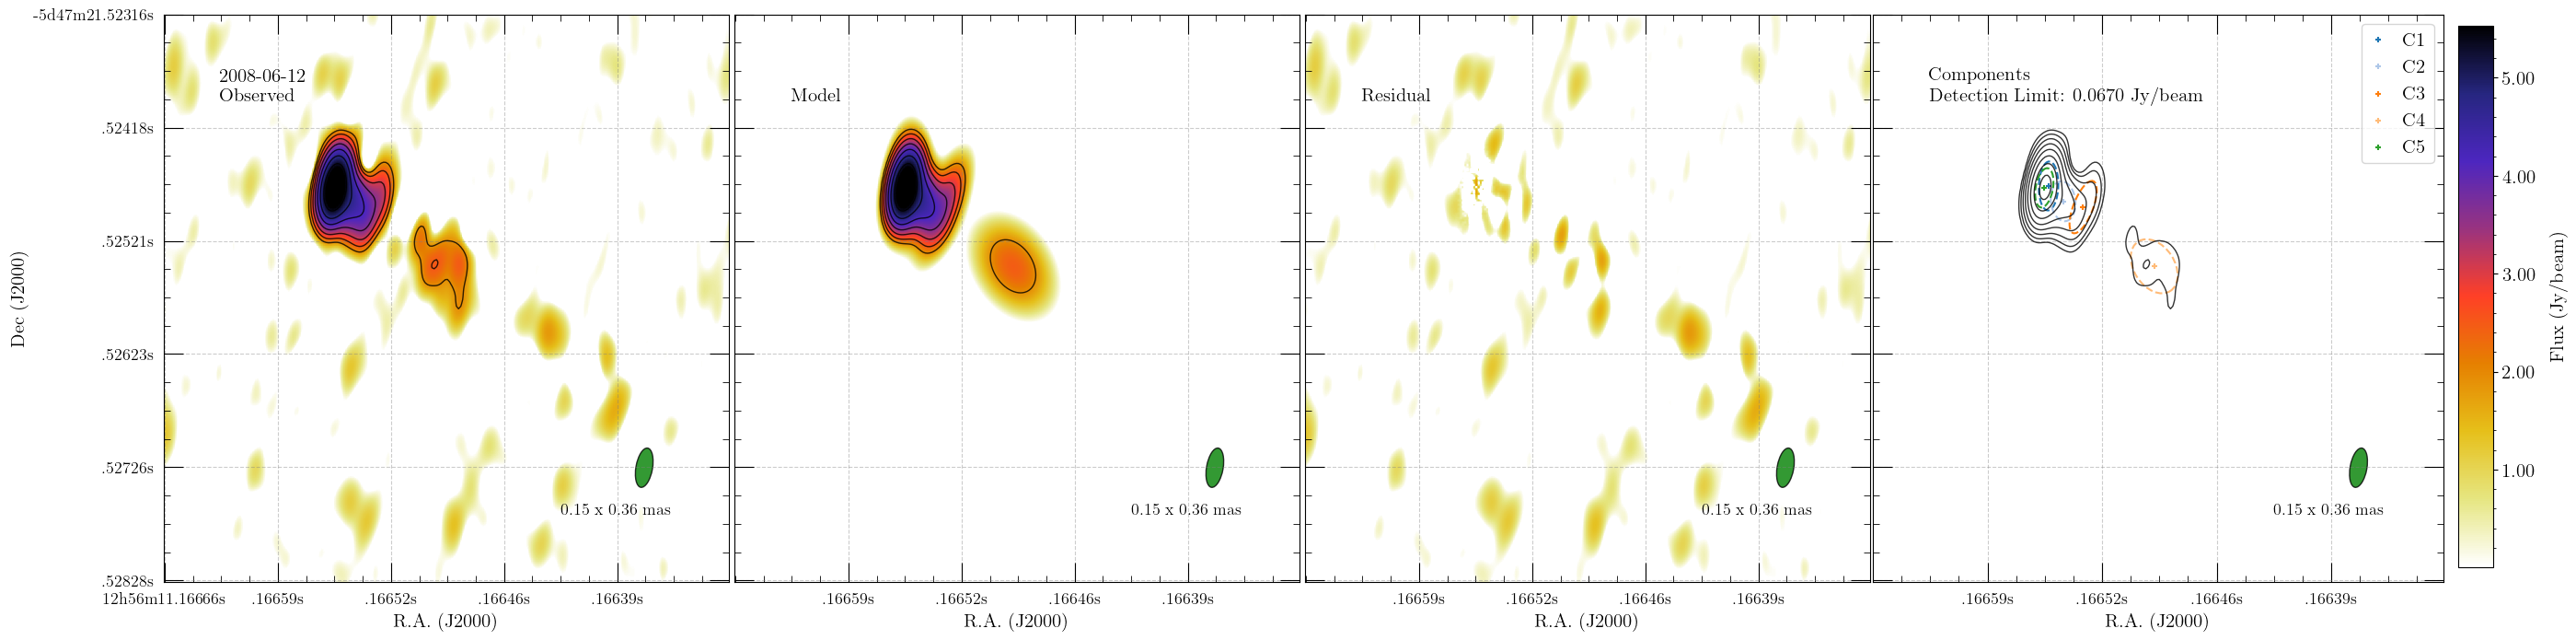

File: ../data/3C_279/2009-05-30/3C279MAY09.IMAP
Date: 2009-05-30
Detection Limit of: 8sigma = 0.0315 Jy/beam
Iter.	Residual.	x	y
1	0.839	87	165
2	0.123	113	147
3	0.047	104	168
4	0.046	80	162


In [ ]:
files_path,folders_path = files_3C279,folders_3C279

#Creation of the table with the summary of the fit
Properties = pd.DataFrame(columns=['File','Date','MJD','Peak_Flux','Total_Flux','Detection_Lim','Ratio','Components','Fit_Status','Clean_Status','Map_RMS','Model_RMS','Residual_RMS','Rate_Min','Rate_Max'])
print(f'Maps to be analized: {len(files_path)}')
for file,folder in zip(files_path,folders_path):
    print(f'File: {file}')
    file_name = Path(file).stem
    hdul_map = fits.open(file) ; hdr_map = hdul_map[0].header ; date = hdr_map['DATE-OBS'] ; print(f'Date: {date}')

    #Map Properties
    map_data,delta,increment,c_pix,f_peak,peak_id,MJD,BMaj,BMin,BPA,f_total = mf.map_properties(file)

    #Determination of the Detection Limit
    treshold = 8 #<---- Change how many times the RMS mean threshold will be taken as the detection limit !!!
    det_limit = mf.detection_limit(treshold,file,map_data)

    #Fitting Map Components
    count,term = mf.map_fitting(folder,file,f_peak,peak_id,BMaj,BMin,BPA,det_limit)

    #Remotion of Bad Components
    no_comp,clean_term = mf.map_cleaning(folder,file,count,det_limit,BMaj,BMin,term)

    #RMS from results
    map_RMS,model_RMS,res_RMS,rate_min,rate_max = mf.RMS_estimations(folder,file,term)

    #Properties data export of the proccess 
    status = 'AutoFit' if term == 'Final' else 'ToCheck' ; ratio = (det_limit/f_peak)*100
    Properties.loc[len(Properties.index)] = [file_name,date,MJD,f_peak,f_total,det_limit,ratio,no_comp,status,clean_term,map_RMS,model_RMS,res_RMS,rate_min,rate_max]

    #Plotting and Component Summary Export
    mf.ploting(folder,file,term,det_limit,increment,f_peak,BMaj,BMin,BPA)
display(Properties)
Properties.to_csv(f'../data/3C_279/Fit_Summary.txt',header=True,index=None,sep='\t') #<---- Change the saving route, if not it will overwrite in the same folder !!!